In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = Path.cwd()
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

# READ DATA

In [3]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 68)


In [4]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_jobs)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (307154, 83)


# Analysis plan:

1. ## [Descriptives, visualizations, and tables](./1.%20descriptives_visualization_and_tables.ipynb)
2. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

3. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

4. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

5. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


## Set dataframes

#### Set variables

In [5]:
# Dataframes dict
dataframes = {
    # 'df_manual': df_manual,
    'df_jobs': df_jobs,
}

# Models dict
sm_models = {
    # 'Logistic': sm.Logit,
    'OLS': sm.OLS,
}

# DVs dict
dvs_for_analysis = {
    # 'binary': ['Categorical Warmth and Competence', dvs],
    'probability': ['Probability Warmth and Competence', dvs_prob],
    # 'binary and probability': ['Categorical and Probability Warmth and Competence', dvs_all],
}

# IVs dict
ivs_for_analysis = {
    # 'categories': ['Categorical Gender and Age', ivs_dummy],
    # 'percentages': ['PPS Gender and Age', ivs_perc],
    'categories and percentages': ['Categorical and PPS Gender and Age', ivs_dummy_and_perc],
}


In [6]:
# Reset font size to 8 for readability
mpl.rcParams['font.size'] = 8
plt.rcParams['font.size'] = 8


### Functions

In [7]:
def get_standardized_beta_regression_coefficients(results, constant):

    # Get standardized regression coefficients
    # std = model.exog.std(0)
    std = np.asarray(constant.std(0))

    if 'const' in results.params and 'const' in constant:
        std[0] = 1
        const_offset = slice(None)
    elif 'const' in results.params:
        const_offset = slice(1, len(results.params)+1)
    elif 'const' not in constant:
        const_offset = slice(None)

    tt = results.t_test(np.diag(std))

    # Make df with standardized and unstandardized coefficients
    df_std_coef = pd.DataFrame({'coef': results.params, 'std err': results.bse, 't': results.tvalues, 'P>|t|': results.pvalues})
    if 'Group Var' in df_std_coef.index:
        df_std_coef = df_std_coef.drop('Group Var', axis='index')
    if 'Intercept' in df_std_coef.index:
        df_std_coef = df_std_coef.drop('Intercept', axis='index')
    # Add standardized coefficients and other data from t-test
    df_std_coef['std coef'] = tt.effect[const_offset]
    df_std_coef['std err'] = tt.sd[const_offset]
    df_std_coef['t'] = tt.statistic[const_offset]
    df_std_coef['P>|t|'] = tt.pvalue[const_offset]
    df_std_coef['[0.025'] = tt.conf_int()[const_offset][:, 0]
    df_std_coef['0.975]'] = tt.conf_int()[const_offset][:, 1]
    # df_std_coef['var'] = [names[i] for i in range(len(names))]
    # df_std_coef = df_std_coef.sort_values('std coef', ascending=False)
    df_std_coef = df_std_coef.reset_index().rename(columns={'index': 'var'})
    df_std_coef = df_std_coef.rename(
        columns={
            'var': 'Variable',
            'coef': 'Unstandardized Coefficent B (b)',
            'std err': 'Standard Error',
            'std coef':'Standardized Coefficient Beta (b*)', 
            't': 't-value', 
            'P>|t|': 'p-value', 
            '[0.025': '95% CI Lower', '0.975]': '95% CI Upper'
        }
    )
    # Reorder columns
    df_std_coef = df_std_coef[[
        'Variable',
        'Unstandardized Coefficent B (b)',
        'Standard Error',
        'Standardized Coefficient Beta (b*)',
        't-value',
        'p-value',
        '95% CI Lower',
        '95% CI Upper'
    ]]

    return tt, df_std_coef


# Specification Curve Analysis

  0%|          | 0/1 [00:00<?, ?it/s]



df_jobs Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth_Probability', 'Competence_Probability']
INDEPENDENT VARIABLES = ['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older', 'Age_Mixed', 'Age_Younger', 'Age_Older_% per Sector', 'Age_Younger_% per Sector']
CONTROLS = ['% Sector per Workforce', 'Job Description num_words', 'English Requirement in Job Ad_Yes', 'Dutch Requirement in Job Ad_Yes']
===== df_jobs OLS SPECIFICATION MODE RESULTS FOR df_jobs USING PROBABILITY x CATEGORIES AND PERCENTAGES =====


Fit complete


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

===== df_jobs RESULTS FOR OLS: Probability Warmth and Competence x Categorical and PPS Gender and Age =====

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


-*20
Fetching df with all controls
-*20
-*20
Fetching df with all controls
-*20


++++++++++++++++++++
Warmth_Probability x Gender_Male_% per Sector

++++++++++++++++++++
      OLS: Probability Warmth and Competence x Categorical and PPS Gender and Age      
Dep. Variable:     Warmth_Probability   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                          9.033e+04
Date:                Sat, 06 May 2023   Prob (F-statistic):                        0.00
Time:                        04:56:29   Log-Likelihood:                     -1.1942e+05
No. Observations:              307154   AIC:                                  2.389e+05
Df Residuals:                  307151   BIC:                                  2.389e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust

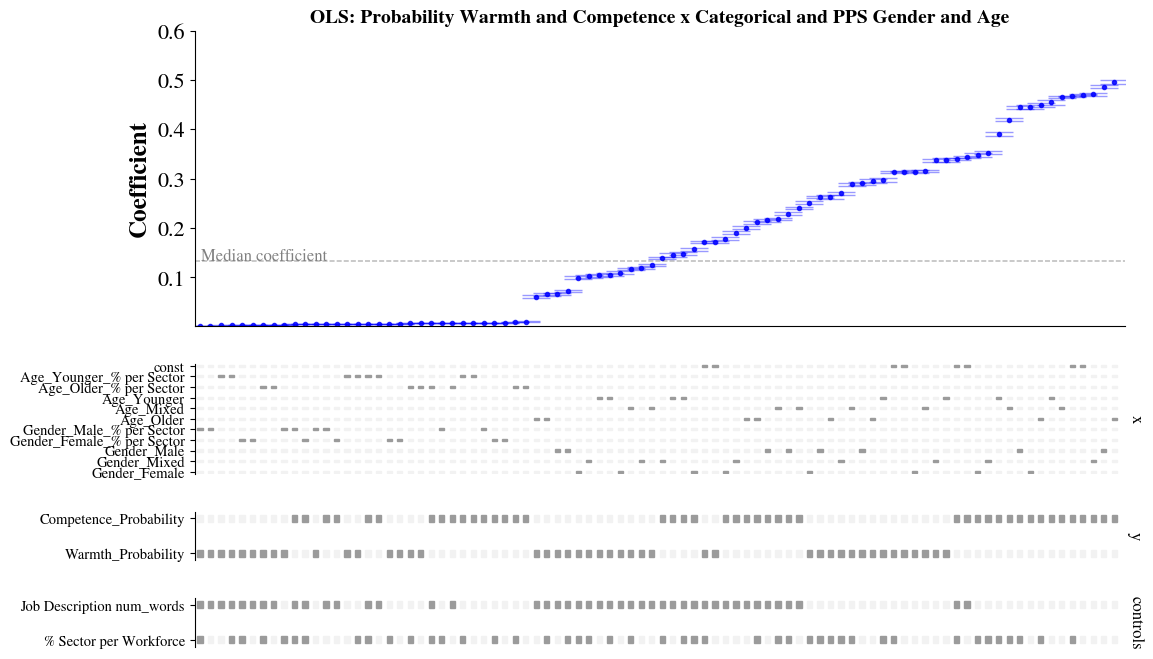

In [8]:
%%time
for (df_name, df), (model_name, model), (dvs_type, [dvs_name, dvs_]), (ivs_type, [ivs_name, ivs_]) in tqdm_product(dataframes.items(), sm_models.items(), dvs_for_analysis.items(), ivs_for_analysis.items()):

    # Set DVs for df_manual
    if df_name == 'df_manual':
        dvs_ = dvs

    # Run specification curve analysis
    print('\n')
    print(f'{df_name} Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs_}\nINDEPENDENT VARIABLES = {ivs_}\nCONTROLS = {controls}')
    print(f'{"="*5} {df_name} {model_name.upper()} SPECIFICATION MODE RESULTS FOR {df_name} USING {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('\n')

    # Add constant
    df = sm.add_constant(df)
    constant = ivs_[:] + ['const']

    try:
        sc = specy.SpecificationCurve(df=df, y_endog=dvs_, x_exog=constant, controls=controls[:2])
        sc.fit(estimator=model)
        df_results = sc.df_r

        # Plot and save
        plot_title = f'{model_name}: {dvs_name} x {ivs_name}'
        print('\n')
        print('~'*80)
        print(f'\n{"="*5} {df_name} RESULTS FOR {plot_title} {"="*5}\n')
        print('~'*80)
        print('\n')

        for image_save_format in tqdm.tqdm(['eps', 'png', 'svg']):
            # Use following if not using forked specification_curve
            # sc.plot(preferred_spec=[iv, dv], save_path=save_path,)
            save_path = f'{plot_save_path}{df_name} - {model_name} Specification Curve - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age.{image_save_format}'
            sc_fig = sc.plot(
                save_path=save_path,
                show_plot=False,
                return_fig=True,
                plot_title=plot_title
            )

        # Get statsmodels results and save
        ## Get controls mask
        controls_mask = df_results['Specification'].apply(lambda x: all(control in x for control in controls[:2]))

        ## Get gender only results
        gender_mask = df_results['Specification'].apply(lambda x: any(item for item in ivs_[:-len(ivs_)//2] if item in x))
        df_results_gender = df_results[gender_mask]
        if df_results_gender[controls_mask].empty:
            print('-*20')
            print('No specification with Gender and all controls.')
            print('-*20')
        else:
            print('-*20')
            print('Fetching df with all controls')
            print('-*20')
            df_results_gender = df_results_gender[controls_mask]
        df_results_gender = df_results_gender.reset_index(drop=True)

        # Get age only results
        age_mask = df_results['Specification'].apply(lambda x: any(item for item in ivs_[len(ivs_)//2:] if item in x))
        df_results_age = df_results[age_mask]
        if df_results_age[controls_mask].empty:
            print('-*20')
            print('No specification with Age and all controls.')
            print('-*20')
        else:
            print('-*20')
            print('Fetching df with all controls')
            print('-*20')
            df_results_age = df_results_age[controls_mask]
        df_results_age = df_results_age.reset_index(drop=True)

        # Iterate over results and print summary
        for df_masked in [df_results_gender, df_results_age]:
            for idx, row in df_masked.iterrows():
                for dv_iv in row['Specification']:
                    if dv_iv in ivs_dummy_and_perc:
                        iv_name = dv_iv
                    elif dv_iv in dvs_:
                        dv_name = dv_iv
                print('\n')
                print('+'*20)
                print(f'{dv_name} x {iv_name}\n')
                print('+'*20)
                print(f'{row["Results"].summary(title=plot_title)}')
                tt, df_std_coef = get_standardized_beta_regression_coefficients(
                    row['Results'],
                    df[[exog for exog in row['Specification'] if exog != row['y_endog']]]
                )
                print('-'*20)
                print('~'*20)
                print(f'STANDARDIZED COEFFICIENTS:\n{df_std_coef}')
                print('~'*20)

                # Save results to file
                save_name = f'{table_save_path}{model_name} specification curve on {ivs_type} {df_name} - {dv_name} x {iv_name} ({dvs_type} Warmth and Competence x {ivs_type} Gender and Age)'
                row['Results'].save(f'{save_name}.pkl')
                df_to_save = pd.DataFrame(csv.reader(row['Results'].summary(title=plot_title).as_csv().split('\n'), delimiter=','))
                df_to_save.to_csv(f'{save_name}.csv')
                df_std_coef.to_csv(f'{save_name} - standardized coefficients.csv')
                df_to_save.style.to_latex(f'{save_name}.tex')
                df_std_coef.style.to_latex(f'{save_name} - standardized coefficients.tex')

        # Highest significant coefficients
        df_top_coeff_p = df_results.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)
        print(f"Highest significant coefficients:\n{df_top_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'Coefficient', 'conf_int', 'pvalues']].head(10)}")

        # Lowest significant coefficients
        df_bottom_coeff_p = df_results.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=True)
        print(f"Lowest significant coefficients:\n{df_bottom_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'Coefficient', 'conf_int', 'pvalues']].head(10)}")

    except(np.linalg.LinAlgError):
        print(f'Singular matrix when using {model_name} with {dvs_type} x {ivs_type}')

    print(f'{"="*5} END OF {df_name} RESULTS FOR {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('~'*80, '\n')
